### Regression Tree

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
import pandas as pd

df = pd.read_csv('covid_final.csv')

In [3]:
X = df[['sni_covid19_vaccination','new_persons_vaccinated', 'stringency_index', 'inc_death',
        'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
        'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline',
        'inc_hosp', 'children', 'adult', 'elderly']]
y = df['inc_case']

print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (850, 12), y shape: (850,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (680, 12), y_train shape: (680,)
X_test shape: (170, 12), y_test shape: (170,)


#### Random Forest

In [5]:
# Define an Random Forest object using RandomForestRegressor 
regression_tree = RandomForestRegressor()
# Fit the model
regression_tree.fit(X_train, y_train)

RandomForestRegressor()

In [6]:
# Make predictions
y_pred = regression_tree.predict(X_test)

In [7]:
# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5890828978.980318


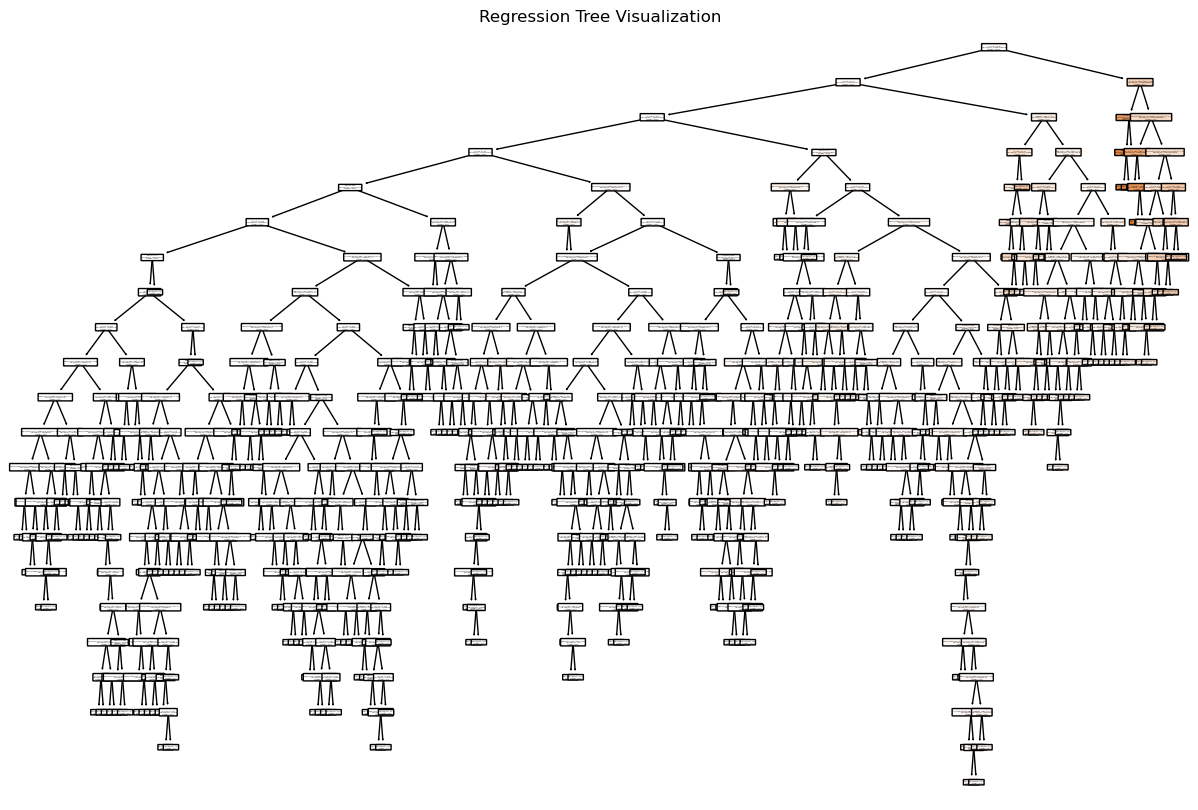

In [8]:
# Visualize the regression tree using plot_tree
individual_tree = regression_tree.estimators_[0] 

plt.figure(figsize=(15, 10))
plot_tree(individual_tree, feature_names=list(X.columns), filled=True, rounded=True, proportion=True, precision=2)
plt.title("Regression Tree Visualization")
plt.show()

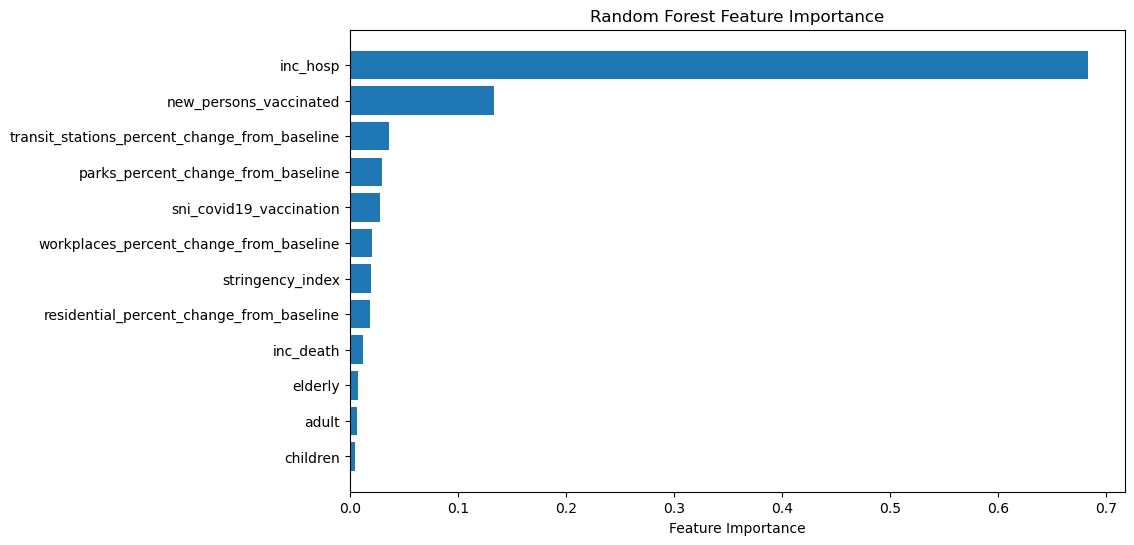

In [9]:
# Get feature importances from the random forest model
feature_importances = regression_tree.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

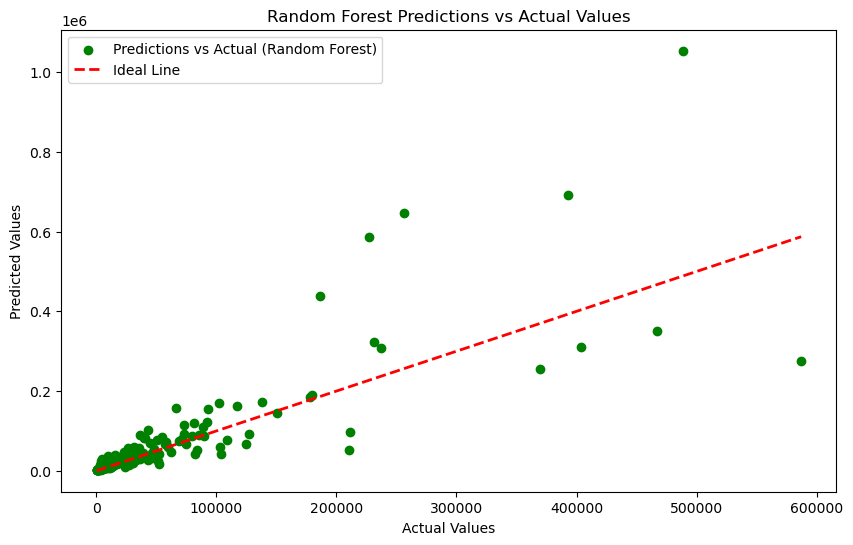

In [10]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predictions vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### XGBoost Regressor

In [11]:
from xgboost import XGBRegressor

# Defining and fitting the model
xgb_model = XGBRegressor(max_depth=3, n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')

Mean Squared Error (XGBoost): 3939409546.1780157


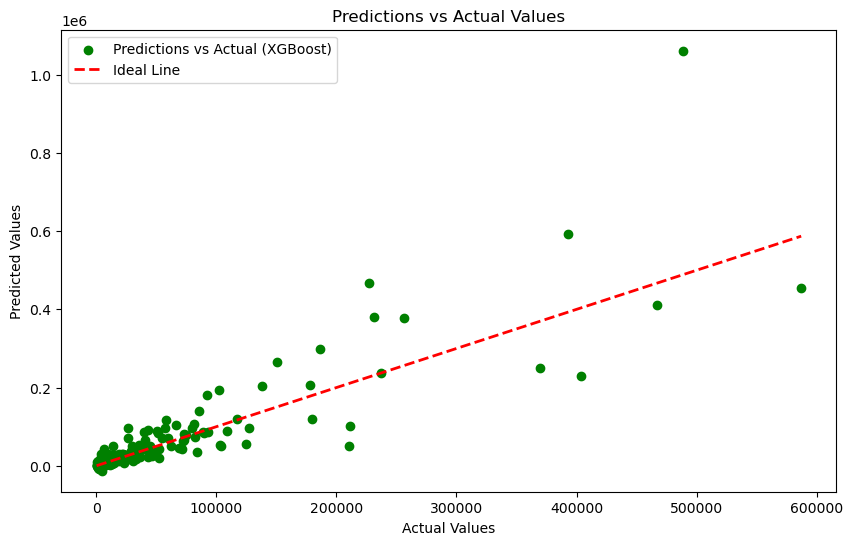

In [12]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='Predictions vs Actual (XGBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()